In [1]:
import avocado
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import itertools

import os
import sys
main_path = os.path.abspath(os.path.join(os.path.dirname("./quantity_search.ipynb"), '..'))
sys.path.insert(0, main_path)
from src.avocado_adapter import AVOCADOFeaturizer, KNNClassifier, Dataset


In [2]:
plot_labels_extra_short = {
    6: 'Single $\mu$-lens',
    15: 'TDE',
    16: 'Eclip. Binary',
    42: 'SNII',
    52: 'SNIax',
    53: 'Mira',
    62: 'SNIbc',
    64: 'Kilonova',
    65: 'M-dwarf',
    67: 'SNIa-91bg',
    88: 'AGN',
    90: 'SNIa',
    92: 'RR lyrae',
    95: 'SLSN-I',
    99: 'Unknown',
}
type_ids = plot_labels_extra_short.keys()
# 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="YlGnBu"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()

In [3]:
def clear_labels(test_labels, pred_labels):
    mask = np.where(test_labels <= 95)[0]
    test_labels2 = test_labels[mask]
    pred_labels2 = pred_labels[mask]
    return test_labels2, pred_labels2

def data_mmmbopf(test_file, pred_file):
    pred_label = np.load(pred_file).astype(int)
    test_label = np.load(test_file).astype(int)
    test_label, pred_label = clear_labels(test_label, pred_label)
    return test_label, pred_label
    
def data_avocado(class_file):
    df = avocado.read_dataframe(class_file, "predictions", chunk=None, num_chunks=None)
    test_label = df["class"].to_numpy()
    pred_label = df["pred"].to_numpy()
    test_label, pred_label = clear_labels(test_label, pred_label)
    return test_label, pred_label

def run_for_data(mmmbopf_files, avocado_files):
    test_label_mmmbopf, pred_label_mmmbopf = data_mmmbopf(*mmmbopf_files)
    test_label_avocado, pred_label_avocado = data_avocado(*avocado_files)
      
    print("DOING CONFUSION MATRIX FOR MMMBOPF") 
    run_for_single_data(test_label_mmmbopf, pred_label_mmmbopf, title="Conf. matrix MMMBOPF")
    
    print("DOING CONFUSION MATRIX FOR AVOCADO")
    run_for_single_data(test_label_avocado, pred_label_avocado, title="Conf. matrix AVOCADO")
    
def run_for_single_data(test_label, pred_label, title="Conf. matrix"):
    classes = np.unique(test_label)
    labels_order = [42, 52, 62, 64, 67, 90, 95, 16, 53, 92, 6, 15, 65, 88]
    labels_keys = [plot_labels_extra_short[x] for x in labels_order]
    conf = confusion_matrix(test_label, pred_label, labels=labels_order)
    acc = balanced_accuracy_score(test_label, pred_label)
    
    fig = plt.figure(figsize=(12, 9))
    plot_confusion_matrix(conf, classes=labels_keys, normalize=True,
                      title='%s (Acc: %.3f)' % (title, acc))

DOING CONFUSION MATRIX FOR MMMBOPF
Normalized confusion matrix
DOING CONFUSION MATRIX FOR AVOCADO
Normalized confusion matrix


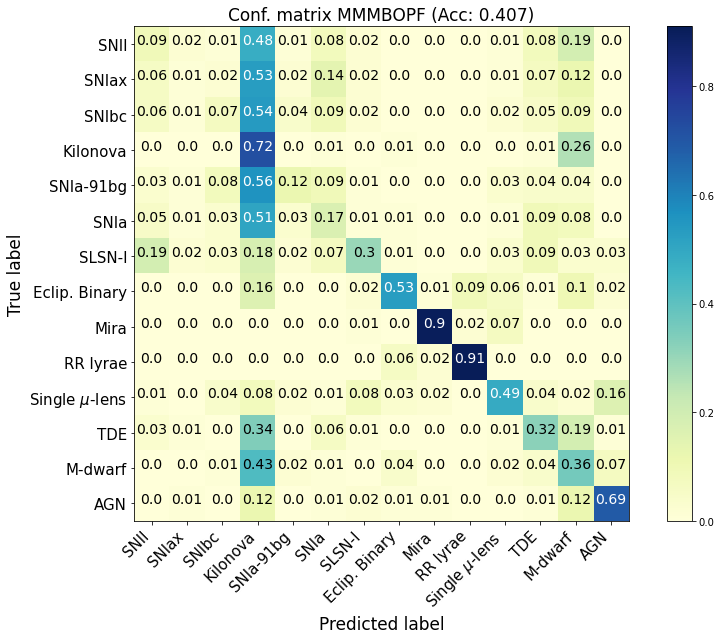

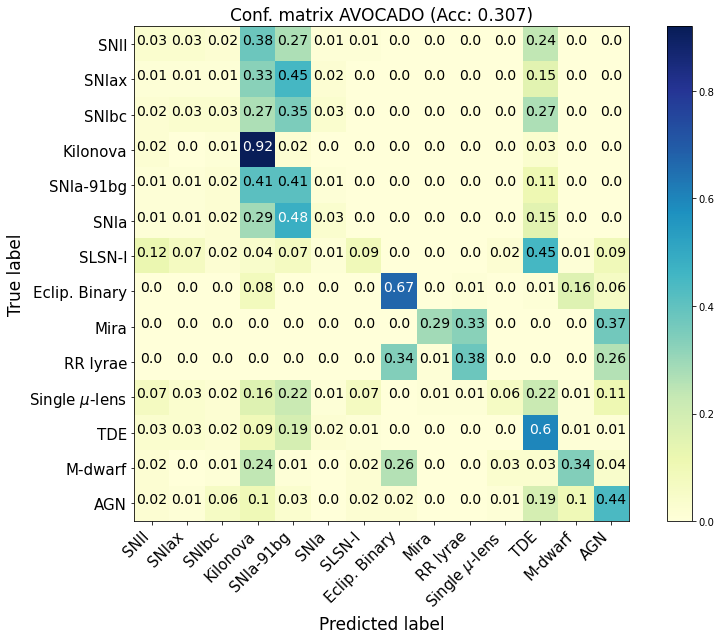

In [4]:
test_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/representation/plasticc_test_labels_20210916-035944.npy"
pred_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/classification/plasticc_train_plasticc_test_predict_20210916-035944.npy"
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_train_K-NN_prototype.h5"

run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))

Normalized confusion matrix
Normalized confusion matrix


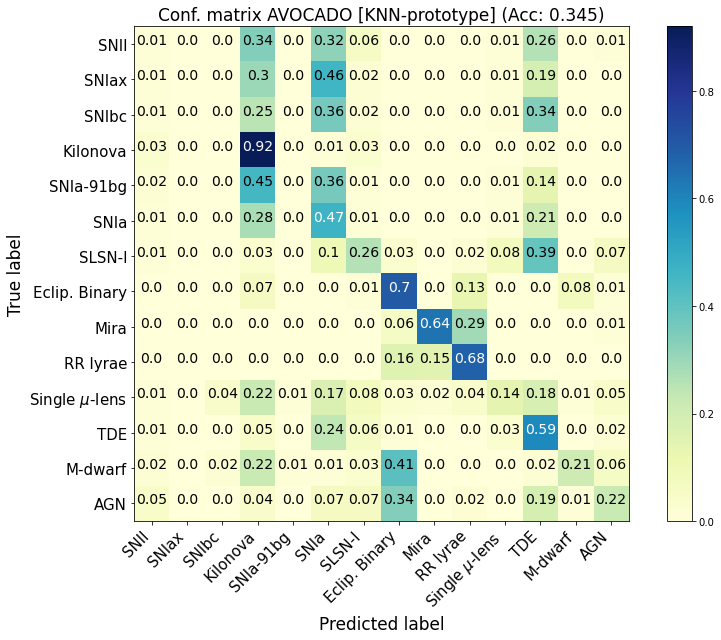

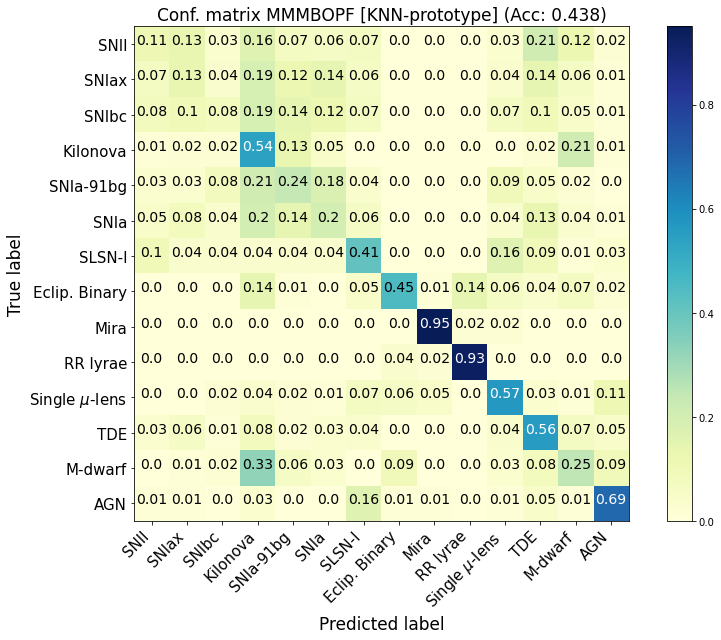

In [6]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_prototype.h5"
class_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_prototype.h5"

test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-prototype]")

test_label, pred_label = data_avocado(class_file_mmmbopf)
run_for_single_data(test_label, pred_label, title="Conf. matrix MMMBOPF [KNN-prototype]")

Normalized confusion matrix
Normalized confusion matrix


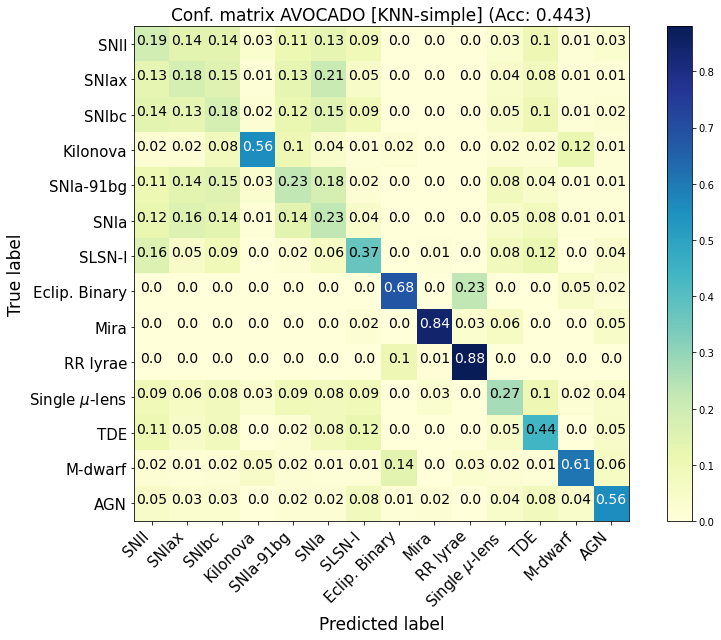

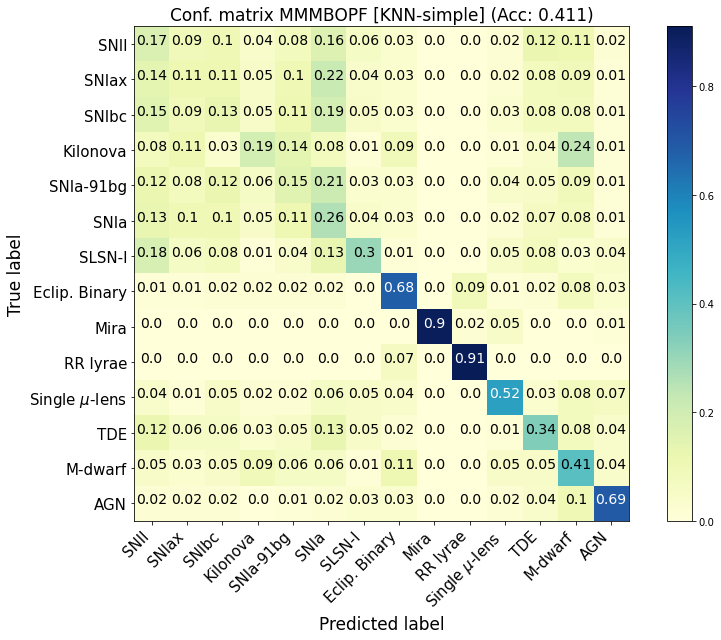

In [7]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN.h5"
class_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-simple]")

test_label, pred_label = data_avocado(class_file_mmmbopf)
run_for_single_data(test_label, pred_label, title="Conf. matrix MMMBOPF [KNN-simple]")

Normalized confusion matrix


AvocadoException: File D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_scaler.h5 is missing the following chunks: 
    predictions: 1, 2, 3, 4, 5, ... (99 total)

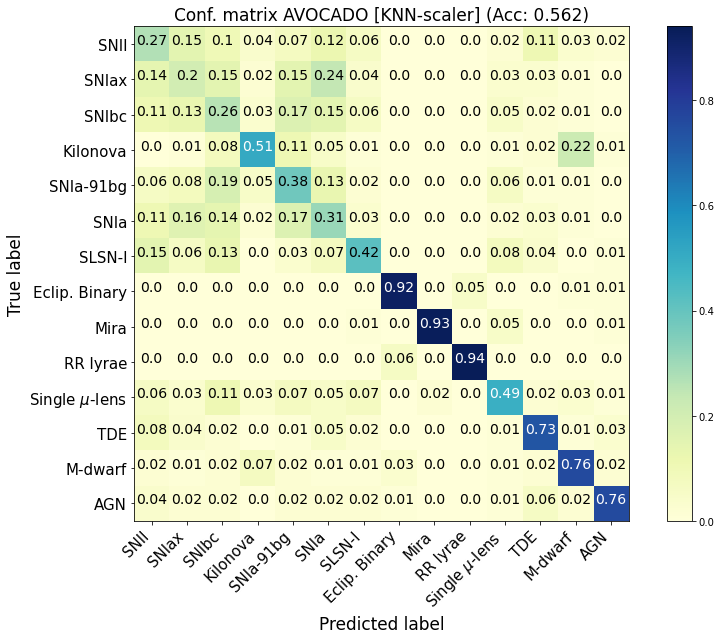

In [8]:
test_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/representation/plasticc_test_labels_20210916-035944.npy"
pred_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/classification/plasticc_augment_v3_plasticc_test_predict_20210924-004132.npy"
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_scaler.h5"
class_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_scaler.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-scaler]")

test_label, pred_label = data_avocado(class_file_mmmbopf)
run_for_single_data(test_label, pred_label, title="Conf. matrix MMMBOPF [KNN-scaler]")

Normalized confusion matrix


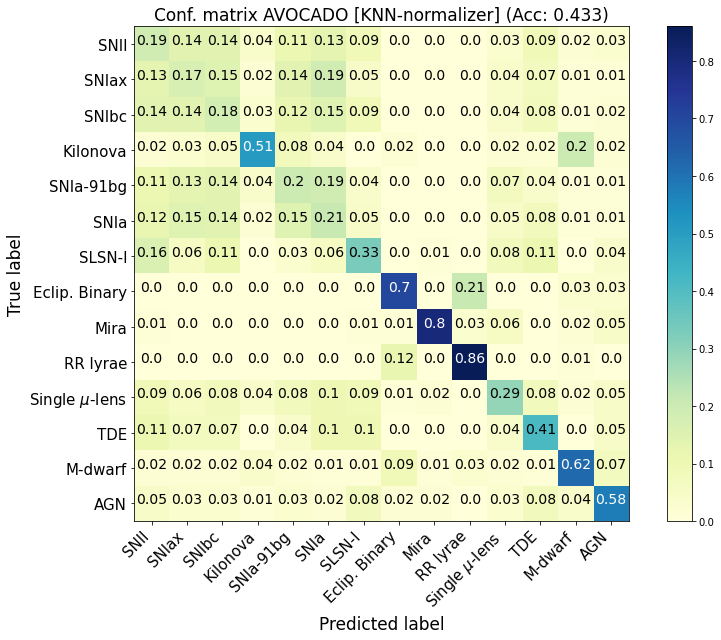

In [50]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_normalizer.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-normalizer]")

Normalized confusion matrix


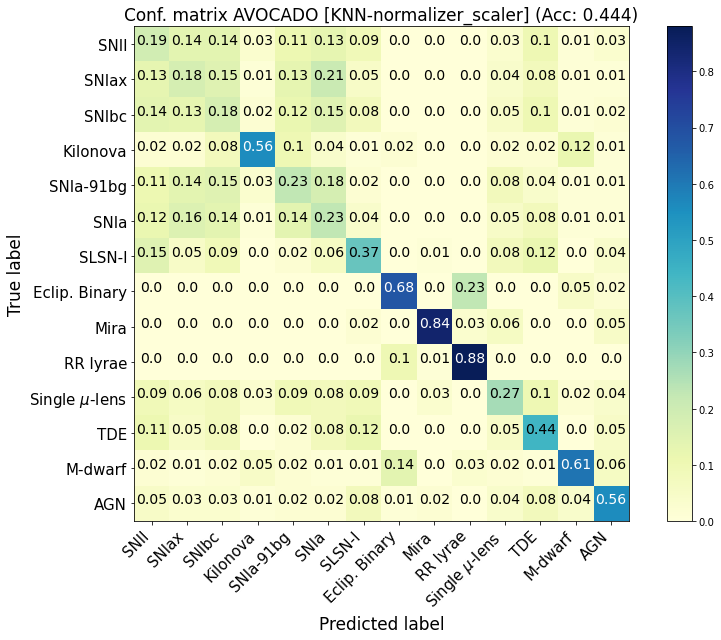

In [51]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_metadata.h5"
class_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_metadata.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-metadata]")

test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix MMMBOPF [KNN-metadata]")

Normalized confusion matrix


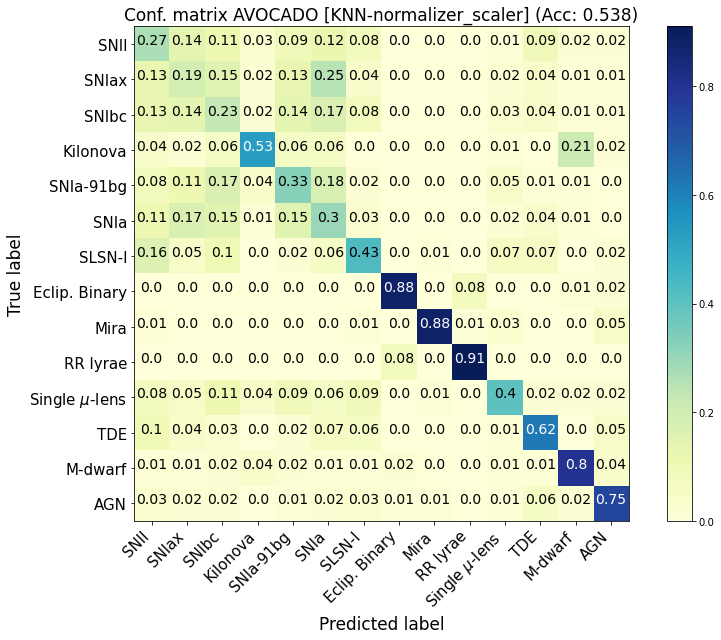

In [9]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_normalizer_scaler.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-normalizer_scaler]")

Normalized confusion matrix
Normalized confusion matrix


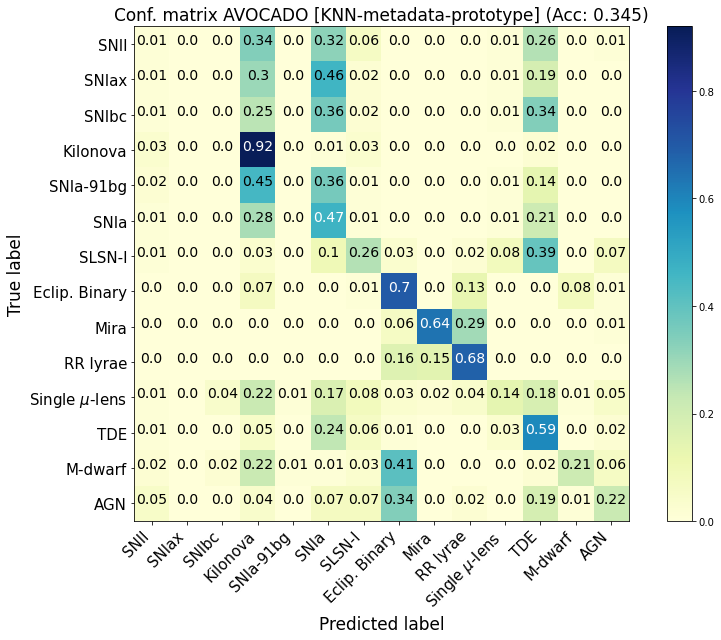

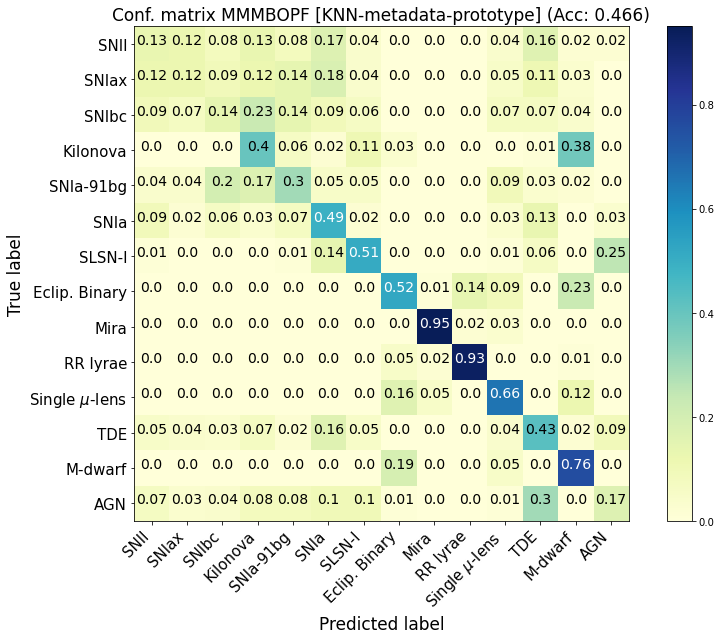

In [10]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_metadata_prototype.h5"
class_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_metadata_prototype.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-metadata-prototype]")

test_label, pred_label = data_avocado(class_file_mmmbopf)
run_for_single_data(test_label, pred_label, title="Conf. matrix MMMBOPF [KNN-metadata-prototype]")

Normalized confusion matrix
Normalized confusion matrix


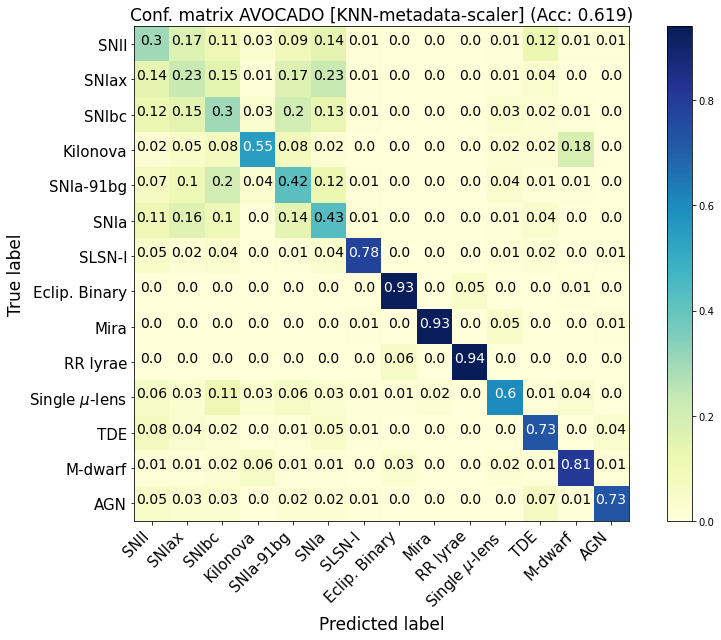

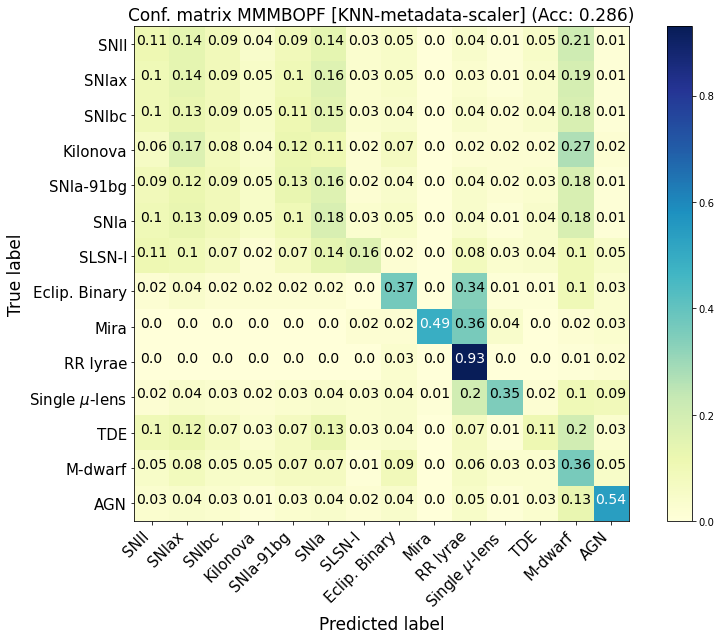

In [11]:
class_file_avocado = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_metadata_scaler.h5"
class_file_mmmbopf = "D:/tesis/data/plasticc/MMMBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_metadata_scaler.h5"

# run_for_data((test_file_mmmbopf, pred_file_mmmbopf), (class_file_avocado,))
test_label, pred_label = data_avocado(class_file_avocado)
run_for_single_data(test_label, pred_label, title="Conf. matrix AVOCADO [KNN-metadata-scaler]")

test_label, pred_label = data_avocado(class_file_mmmbopf)
run_for_single_data(test_label, pred_label, title="Conf. matrix MMMBOPF [KNN-metadata-scaler]")

# OBSERVATIONS

## On feature-only classifier

- 1nn without prototype is really bad on both methods (with or without normalize/scale) giving less than 40% acc
- avocado han an overall balanced accuracy higher than our method in aprox 2% (42% vs 44%) for 1-NN wiht prototype
- data augmentation works good
- for avocado the best is to do 1-NN, without prototype and with standard scaler


## on feature-metadata classifier

* on KNN
    
    - need plots for our method
    - avocado with 1-nn and using standard scaler gives the best results so far
    
    
* on LightGBM
    
    - avocado has better balanced accuracy
    
    
* other classifier(SVM/linearSVC/logisticRegression/etc)
    
    - in progress
    